## Quiz; Backpropagation

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [2]:
def plot_graph(X,Y,X_hat=None,Y_hat=None,str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None :
        plt.title(str_title,fontsize=20, pad=20)
        
    plt.plot(X,Y, ls='none', marker='o')
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
        
    plt.tick_params(axis='both',labelsize=14)

## Implement backpropagtaion

### generate data

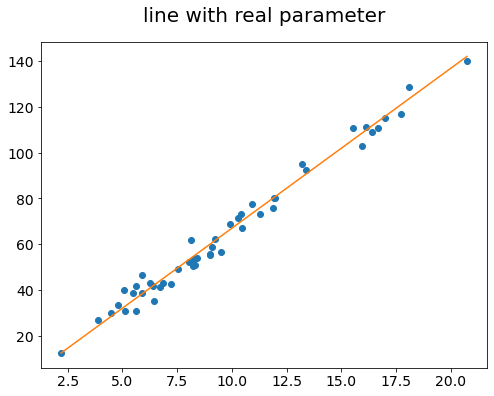

In [3]:
N = 50

x = tf.random.normal([N], 10, 5)
y = 7 * x - 3 + tf.random.normal([N], 0, 4)
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl,7*x_fl-3,str_title="line with real parameter")

### define function -1

In [4]:
def relu(x):
    if x > 0.0 :
        return x
    else :
        return 0.0

# y = relu(wx+b)
def MSE(x, y, w, b):
    totalError = 0
    for i in range(N):
        x_i = x[i]
        y_i = y[i]
        totalError += (y_i - relu(w * x_i + b)) ** 2
    return totalError / float(N)

### define function for backpropagation

![backprop](backpropagation.png)

### TODO

In [5]:
def cal_gradient(x, y, w, b):
    b_gradient = 0
    w_gradient = 0
    
    for i in range(0, N):
        x_i = x[i]
        y_i = y[i]
        
        dL_df1 = 1.0
        dL_df2 = dL_df1 * (1/float(N))
        dL_df3 = dL_df2 * 2.0 * (y_i - relu(w * x_i + b))
        dL_df4 = dL_df3 * 1.0
        dL_df5 = dL_df4 * -1
        if (w * x_i) + b > 0.0 :
            dL_df6 = dL_df5 * 1.0
        else :
            dL_df6 = 0.0
        b_gradient += dL_df6 * 1.0 
        dL_df7 = dL_df6 * x_i
        w_gradient += dL_df7
    return [w_gradient, b_gradient]

### define function -2

In [6]:
def apply_gradient(gradients, parameters, learning_rate):
    [w_g, b_g] = gradients
    [w, b] = parameters
    w = w - learning_rate * w_g
    b = b - learning_rate * b_g
    return [w, b]

def run_opt(x, y, w, b, learning_rate):
    gradients = cal_gradient(x, y, w, b)
    return apply_gradient(gradients, [w, b], learning_rate)

In [7]:
w = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

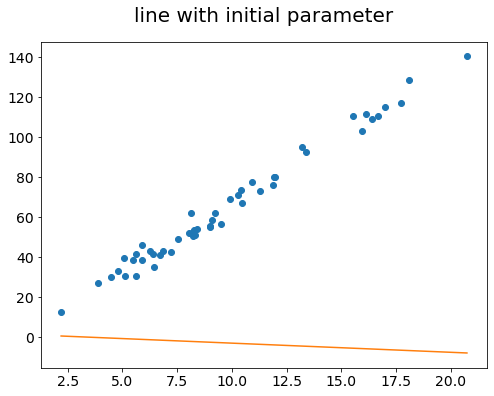

In [8]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with initial parameter")

In [9]:
learning_rate = 0.005
training_steps = 2000
display_step = 200

for step in range(training_steps):
    [w_new, b_new] = run_opt(x, y, w, b, learning_rate)
    w = w_new
    b = b_new
    
    if step % display_step == 0:
        loss = MSE(x, y, w, b)
        print("step: ", step, ", loss: ", loss.numpy(), ", w: ", w.numpy(), ", b: ", b.numpy())

step:  0 , loss:  [5049.966] , w:  [-0.45177543] , b:  [2.3399363]
step:  200 , loss:  [17.942577] , w:  [6.5062737] , b:  [2.2979999]
step:  400 , loss:  [16.30939] , w:  [6.616155] , b:  [1.0297279]
step:  600 , loss:  [15.450168] , w:  [6.6958556] , b:  [0.1098096]
step:  800 , loss:  [14.998114] , w:  [6.753665] , b:  [-0.5574368]
step:  1000 , loss:  [14.760296] , w:  [6.795596] , b:  [-1.0414124]
step:  1200 , loss:  [14.635179] , w:  [6.82601] , b:  [-1.3924552]
step:  1400 , loss:  [14.5693445] , w:  [6.84807] , b:  [-1.6470784]
step:  1600 , loss:  [14.534716] , w:  [6.8640714] , b:  [-1.8317637]
step:  1800 , loss:  [14.516498] , w:  [6.8756776] , b:  [-1.9657227]


### check learned parameter

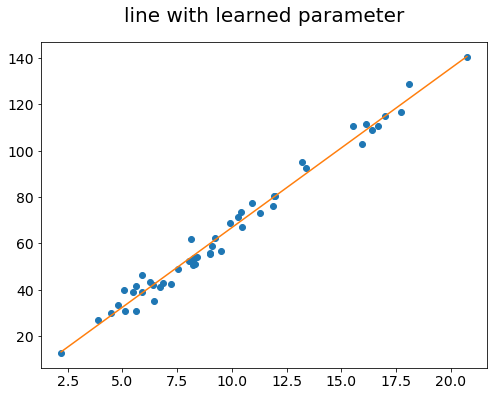

In [10]:
x_fl = np.linspace(np.min(x),np.max(x),100)
plot_graph(x,y,x_fl, w*x_fl+b, str_title="line with learned parameter")